In [14]:
!pip install requests
# Downlaod requests for downalaod dataset with curl way

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
# importing all possible library 

In [18]:
import requests  # importing library re

url = "https://www.kaggle.com/api/v1/datasets/download/ulrikthygepedersen/online-retail-dataset"
response = requests.get(url, allow_redirects=True)

with open('C:/Users/АРТЕМ/Downloads/archive.zip', 'wb') as file:
    file.write(response.content)


In [20]:
import pandas as pd


file_path = "C:/Projects/online_retail.csv.csv"
# Read CSV file
data = pd.read_csv(file_path)

# output 5
print(data.head())
print("File successful!")


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
File successful!


In [23]:
import os
print(os.getcwd())
# Попытка загрузить CSV-файл
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!\n")
    
    # Описание данных
    print("1. Statistical Description of Data:")
    print(data.describe(), "\n")
    
    # Основная информация о данных
    print("2. Basic Information about Data:")
    print(data.info(), "\n")
  
    # Проверка пропущенных значений
    print("3. Missing Values in Each Column:")
    print(data.isnull().sum(), "\n")
    
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print("An error occurred:", e)

C:\Users\Артем
File loaded successfully!

1. Statistical Description of Data:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000 

2. Basic Information about Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice   

In [25]:
duplicate_rows = data[data.duplicated()] #check for duplicates
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 5268


In [27]:
!pip install matplotlib


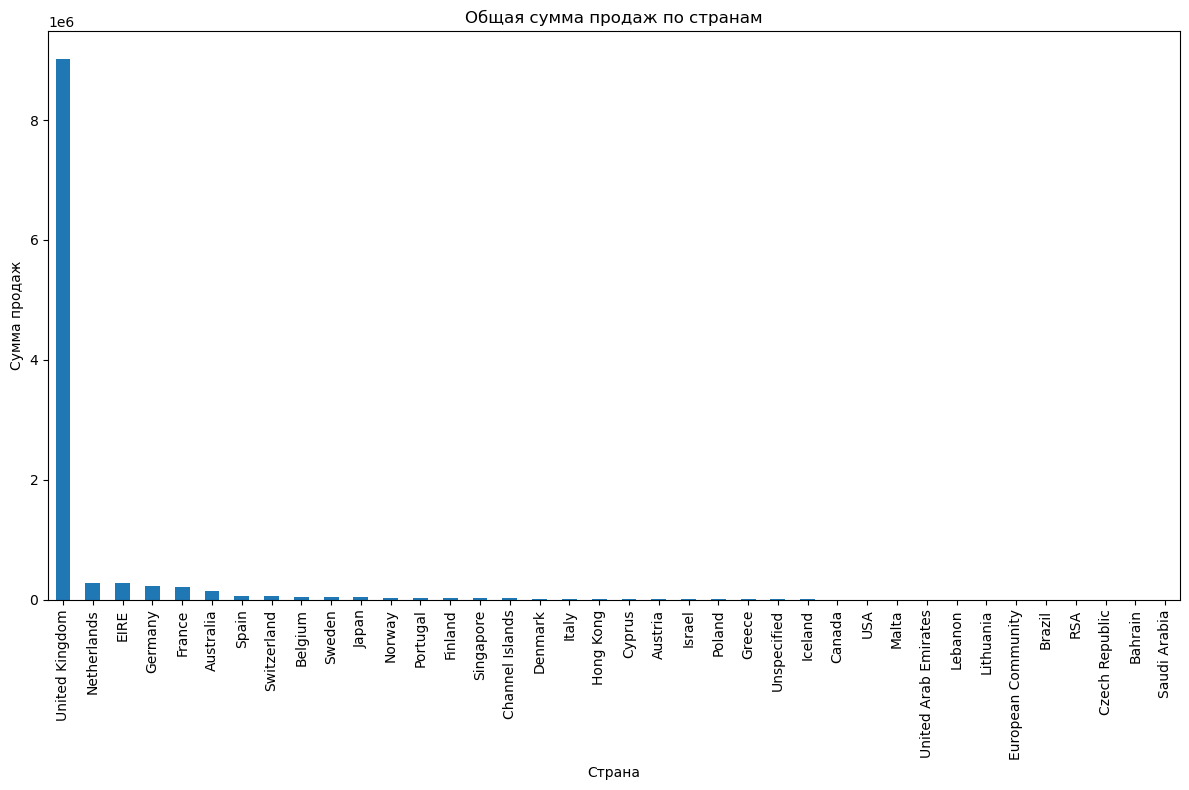

In [28]:
# Предполагая, что вы уже загрузили данные в переменную 'data'
# data = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Предварительная обработка данных
data = data.dropna(subset=['Quantity', 'UnitPrice', 'Country'])
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Создание столбца 'TotalPrice'
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Анализ данных
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar')
plt.title('Общая сумма продаж по странам')
plt.xlabel('Страна')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [31]:
data.head()
#Описание столбцов:
#InvoiceNo: Номер счета-фактуры. Уникальный идентификатор для каждой транзакции или заказа.
#StockCode: Код товара. Уникальный идентификатор для каждого товара в каталоге.
#Description: Описание товара. Название или описание продукта.
#Quantity: Количество единиц товара, проданных в данной транзакции.
#InvoiceDate: Дата и время выставления счета-фактуры.
#UnitPrice: Цена за единицу товара.
#CustomerID: Уникальный идентификатор клиента.
#Country: Страна, где находится клиент.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
# Поиск дубликатов по всем столбцам
duplicate_rows = data[data.duplicated()]

# Количество дубликатов
print(f"Общее количество дубликатов: {duplicate_rows.shape[0]}")
# Вывод первых 20 дубликатов
duplicates_sample = duplicate_rows.head(20)
print("Первые 20 дубликатов:")
print(duplicates_sample)


Общее количество дубликатов: 5226
Первые 20 дубликатов:
    InvoiceNo StockCode                          Description  Quantity  \
517    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327    ROUND SNACK BOXES SET OF 4 SKULLS         1   
587    536412     22273                 FELTCRAFT DOLL MOLLY         1   
589    536412     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
594    536412     22141       CHRISTMAS CRAFT TREE TOP ANGEL         1   
598    536412     21448            12 DAISY PEGS IN WOOD BOX         1   
600    536412     22569          FELTCRAFT CUSHION BUTTERFLY         2   
601    536412     21448            12 DAISY PEGS IN WOOD BOX         2   
604    536412     21448            12 DAISY PEGS IN WOOD

In [35]:
print("Типы данных перед преобразованием:")
print(data.dtypes)


Типы данных перед преобразованием:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object


In [37]:
# Строки с пропущенными значениями
missing_rows = data[data.isnull().any(axis=1)]

print("Количество строк с пропущенными значениями:", missing_rows.shape[0])
print("Строки с пропущенными значениями:")
print(missing_rows)


Количество строк с пропущенными значениями: 132220
Строки с пропущенными значениями:
       InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice 

In [39]:
# Строки с отрицательным значением в 'Quantity'
negative_quantity = data[data['Quantity'] < 0]

print("Количество строк с отрицательным Quantity:", negative_quantity.shape[0])
print("Строки с отрицательным значением в 'Quantity':")
print(negative_quantity)

# Строки с отрицательным значением в 'UnitPrice'
negative_unitprice = data[data['UnitPrice'] < 0]

print("Количество строк с отрицательным UnitPrice:", negative_unitprice.shape[0])
print("Строки с отрицательным значением в 'UnitPrice':")
print(negative_unitprice)


Количество строк с отрицательным Quantity: 0
Строки с отрицательным значением в 'Quantity':
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []
Количество строк с отрицательным UnitPrice: 0
Строки с отрицательным значением в 'UnitPrice':
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []


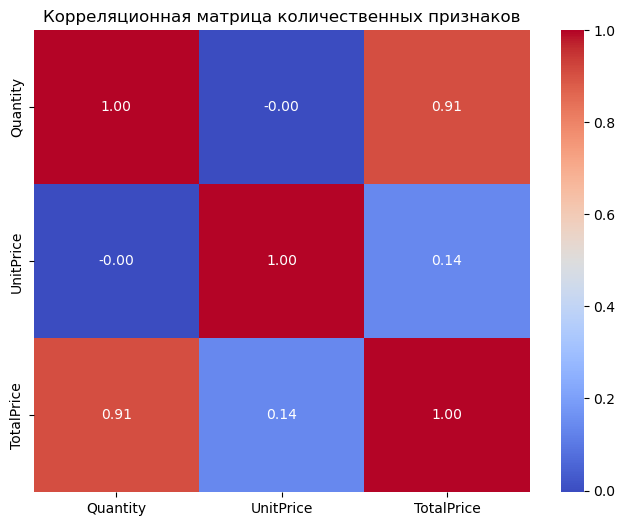

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычислим корреляционную матрицу для количественных признаков
correlation_matrix = data[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

# Построим тепловую карту для корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных признаков')
plt.show()


In [43]:
# Группировка данных по StockCode и расчет минимальной и максимальной цены
price_changes = data.groupby('StockCode')['UnitPrice'].agg(['min', 'max']).reset_index()

# Добавим столбец с индикатором изменения цены
price_changes['PriceChanged'] = price_changes['min'] != price_changes['max']

# Выведем продукты, у которых изменилась цена
price_changed_products = price_changes[price_changes['PriceChanged']]

print("Количество продуктов с изменившейся ценой:", price_changed_products.shape[0])
print("Примеры продуктов с изменившейся ценой:")
print(price_changed_products.head(20))


Количество продуктов с изменившейся ценой: 3366
Примеры продуктов с изменившейся ценой:
   StockCode    min    max  PriceChanged
0      10002   0.85   1.66          True
1      10080   0.39   0.85          True
6      10125   0.42   1.66          True
7      10133   0.42   1.66          True
8      10135   0.25   2.51          True
9      11001   0.83   3.36          True
11     15034   0.07   0.85          True
12     15036   0.53   1.63          True
13     15039   0.53   1.66          True
14    15044A   2.55   5.79          True
15    15044B   2.55   5.91          True
16    15044C   2.55   5.91          True
17    15044D   2.55   5.91          True
18   15056BL   1.95  12.72          True
19    15056N   1.95  12.72          True
20    15056P   4.60  12.72          True
21   15056bl  12.46  12.72          True
22    15056n  12.46  12.72          True
23    15056p  12.46  12.72          True
24    15058A   6.75  24.96          True


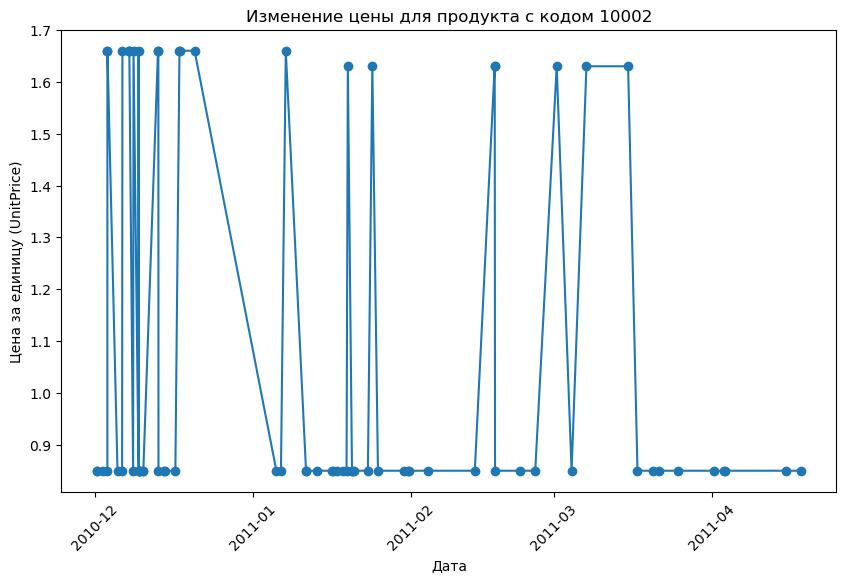

In [46]:
# Выберем один продукт с изменяющейся ценой для визуализации
sample_product_code = price_changed_products['StockCode'].iloc[0]

# Фильтрация данных для выбранного продукта и сортировка по дате
product_data = data[data['StockCode'] == sample_product_code].sort_values('InvoiceDate')

# Построение графика изменения цены во времени
plt.figure(figsize=(10, 6))
plt.plot(product_data['InvoiceDate'], product_data['UnitPrice'], marker='o')
plt.title(f'Изменение цены для продукта с кодом {sample_product_code}')
plt.xlabel('Дата')
plt.ylabel('Цена за единицу (UnitPrice)')
plt.xticks(rotation=45)
plt.show()


In [48]:
# Группируем данные по StockCode и Description, чтобы увидеть все уникальные комбинации
unique_descriptions = data[['StockCode', 'Description']].drop_duplicates()

# Подсчитаем количество уникальных описаний для каждого StockCode
description_counts = unique_descriptions.groupby('StockCode').size()

# Найдем StockCode с более чем одним уникальным описанием
multiple_descriptions = description_counts[description_counts > 1]

# Выведем данные для StockCode, у которых разные описания
if not multiple_descriptions.empty:
    print("Продукты с разными описаниями для одного StockCode:")
    print(unique_descriptions[unique_descriptions['StockCode'].isin(multiple_descriptions.index)])
else:
    print("Все продукты имеют одинаковое описание для каждого StockCode.")


Продукты с разными описаниями для одного StockCode:
       StockCode                         Description
0         85123A  WHITE HANGING HEART T-LIGHT HOLDER
1          71053                 WHITE METAL LANTERN
8          22632           HAND WARMER RED POLKA DOT
40         22900     SET 2 TEA TOWELS I LOVE LONDON 
58         82486   WOOD S/3 CABINET ANT WHITE FINISH
...          ...                                 ...
467349     71477  COLOURED GLASS STAR T-LIGHT HOLDER
481663     71053        WHITE MOROCCAN METAL LANTERN
501725    90014C     SILVER AND BLACK ORBIT NECKLACE
502207     21175       GIN AND TONIC DIET METAL SIGN
537621    85123A  CREAM HANGING HEART T-LIGHT HOLDER

[459 rows x 2 columns]
